In [31]:
# ATM_Maintenance_Prediction.ipynb

# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# 2️⃣ Load Dataset
df = pd.read_csv('../data/ai4i2020.csv')

In [9]:
# 3️⃣ Exploratory Data Analysis (EDA)
# Display first few rows
df.head()
df.info()
df.describe()
df.isnull().sum()  # Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

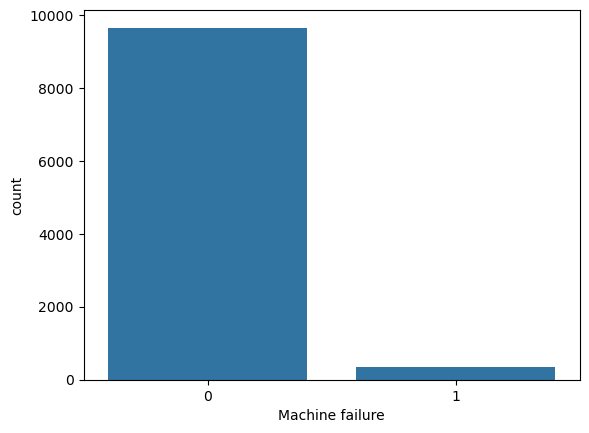

In [7]:
# Visualize the target variable
sns.countplot(x=df['Machine failure'])
plt.show()

C:\Users\owner\AppData\Local\Temp\ipykernel_9276\571362686.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Machine failure'], palette='coolwarm')


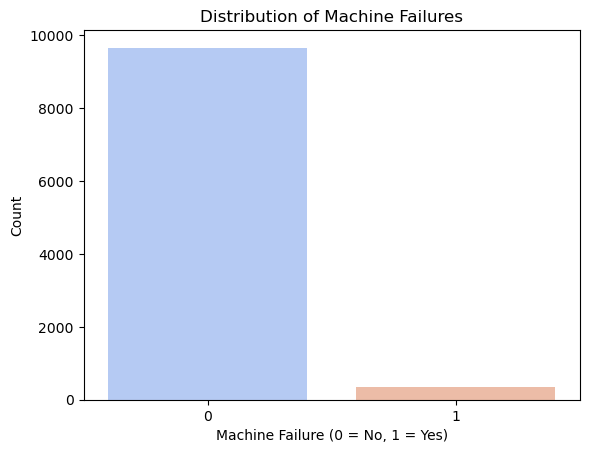

In [11]:
sns.countplot(x=df['Machine failure'], palette='coolwarm')
plt.title("Distribution of Machine Failures")
plt.xlabel("Machine Failure (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


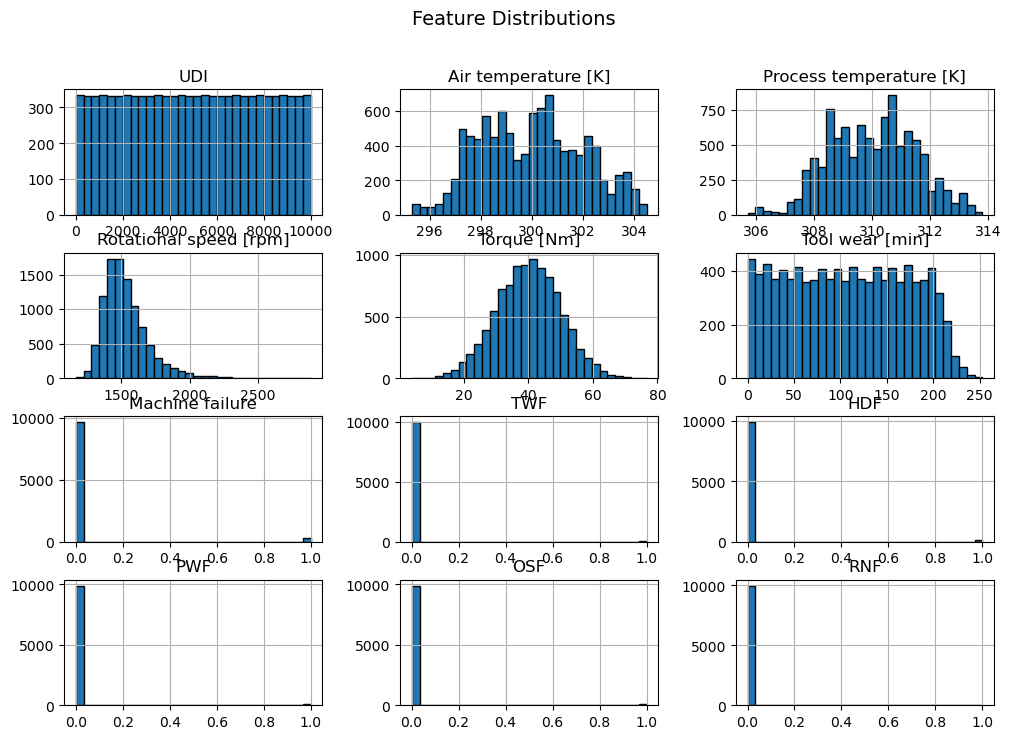

In [15]:
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()


In [23]:
# 4️⃣ Data Preprocessing
# Define features and target
X = df.drop(['UDI', 'Product ID', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)
y = df['Machine failure']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print(df.columns)


Index(['UDI', 'Product ID', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Type_L',
       'Type_M'],
      dtype='object')


In [33]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

joblib.dump(atm_rf_model', '../models/atm_rf_model.pkl')  # Save model
print("Model training complete. Model saved as atm_rf_model.pkl.")

Model training complete. Model saved as atm_rf_model.pkl.


In [45]:
# 6️⃣ Model Evaluation
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9845

Confusion Matrix:
 [[1934    5]
 [  26   35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.88      0.57      0.69        61

    accuracy                           0.98      2000
   macro avg       0.93      0.79      0.84      2000
weighted avg       0.98      0.98      0.98      2000



In [63]:
# Sample test data (representing a single instance for prediction)
sample_test_data = {
    'Air temperature [K]': [300.0],
    'Process temperature [K]': [290.0],
    'Rotational speed [rpm]': [3500],
    'Torque [Nm]': [55.0],
    'Tool wear [min]': [15.0],
    'Type_L': [0],  # Assuming 0 for Type_L (you may set accordingly based on your encoding)
    'Type_M': [1]   # Assuming 1 for Type_M
}

# Convert sample data to DataFrame for prediction
sample_data_df = pd.DataFrame(sample_test_data)

# Ensure the columns are in the same order as the training data
sample_data_df = sample_data_df[['Air temperature [K]', 'Process temperature [K]', 
                                  'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
                                  'Type_L', 'Type_M']]  # Adjust the column order if necessary

# Check the structure of the sample data
print(sample_data_df)

# Make prediction
prediction = model.predict(sample_data_df)

# Show prediction
prediction_label = "Failure" if prediction[0] == 1 else "No Failure"
print(f"Prediction: {prediction_label}")


   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                300.0                    290.0                    3500   

   Torque [Nm]  Tool wear [min]  Type_L  Type_M  
0         55.0             15.0       0       1  
Prediction: No Failure
